## 01. Import Libraries & Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# path shortcut
path = r'/Users/nicolechiu/OneDrive - InterVarsity Christian Fellowship USA/Documents/CF Data Analytics/Achievement 6/07-2023 Employee Attrition'

In [4]:
# employee attrition dataframe creation
df_ea = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'employee_attrition_wrangled.6.2.csv'), index_col = False)

In [5]:
df_ea.shape

(49653, 20)

In [6]:
df_ea.head()

,Unnamed: 0,EmployeeID,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_full,termreason_desc,termtype_desc,status_year,status,business_unit,age_today,generation,manager?
0,0,1318,1/3/54,8/28/89,1/1/00,52,17,Vancouver,Executive,CEO,35,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE,69,Boomers,Yes
1,1,1318,1/3/54,8/28/89,1/1/00,53,18,Vancouver,Executive,CEO,35,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE,69,Boomers,Yes
2,2,1318,1/3/54,8/28/89,1/1/00,54,19,Vancouver,Executive,CEO,35,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE,69,Boomers,Yes
3,3,1318,1/3/54,8/28/89,1/1/00,55,20,Vancouver,Executive,CEO,35,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE,69,Boomers,Yes
4,4,1318,1/3/54,8/28/89,1/1/00,56,21,Vancouver,Executive,CEO,35,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE,69,Boomers,Yes


In [7]:
# Drop Unnamed column
df_ea = df_ea.drop(columns = ['Unnamed: 0'])

In [8]:
df_ea.columns

Index(['EmployeeID', 'birthdate_key', 'orighiredate_key',
       'terminationdate_key', 'age', 'length_of_service', 'city_name',
       'department_name', 'job_title', 'store_name', 'gender_full',
       'termreason_desc', 'termtype_desc', 'status_year', 'status',
       'business_unit', 'age_today', 'generation', 'manager?'],
      dtype='object')

In [9]:
# Select only numerical variables and put them in a list called columns

columns = ['age', 'length_of_service']

In [10]:
# Create subset

df_ea_num = df_ea[columns]

## 02. Elbow Technique

In [11]:
num_cl = range(1, 5) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [12]:
score = [kmeans[i].fit(df_ea_num).score(df_ea_num) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/nicolechiu/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/nicolechiu/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/nicolechiu/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/nicolechiu/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[-9654631.193402208,
 -2593717.3116291636,
 -1329248.2482453967,
 -879629.5102004573]

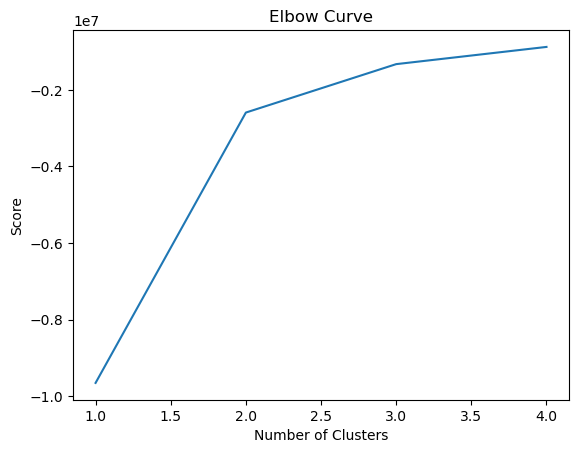

In [13]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

From the above visualization, it's difficult to determine where exactly the curve straightens out. Will run the k-means algorithm again with a larger range (initially did 1-5 since did not think too many clusters would exist).

In [14]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [15]:
score = [kmeans[i].fit(df_ea_num).score(df_ea_num) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/nicolechiu/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/nicolechiu/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/nicolechiu/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/nicolechiu/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[-9654631.193402208,
 -2593717.3116291636,
 -1329621.0707824815,
 -879952.3384952229,
 -672766.2834464731,
 -480413.57028611295,
 -367249.73661284306,
 -295716.5580848267,
 -249424.33170033435]

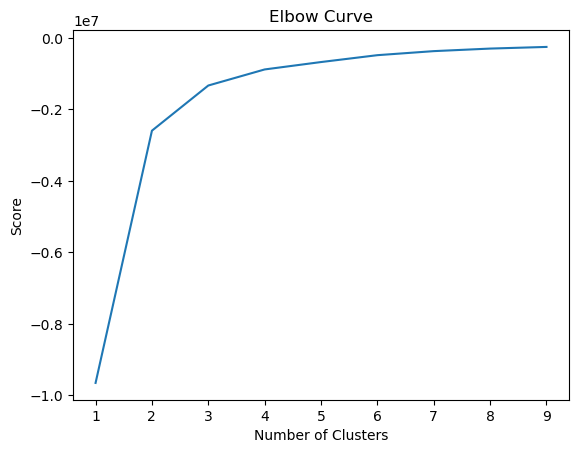

In [16]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

From the chart, it seems that there is a jump from 2 to 3 on the x-axis, with a smaller jump from 3 to 4 and then it straightens out. I would conclude that the optimal count of clusters is 3.

## 03. k-means Algorithm

In [18]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [19]:
# Fit the k-means object to the data.

kmeans.fit(df_ea_num)

/Users/nicolechiu/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

## 04. Insert New Column

In [20]:
df_ea_num['clusters'] = kmeans.fit_predict(df_ea_num)

/Users/nicolechiu/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/2x/7bz34nhx55b0cg_q5g2zvsn40000gn/T/ipykernel_71612/3946967410.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ea_num['clusters'] = kmeans.fit_predict(df_ea_num)


In [21]:
df_ea_num.head()

,age,length_of_service,clusters
0,52,17,0
1,53,18,0
2,54,19,0
3,55,20,0
4,56,21,0


In [23]:
df_ea_num['clusters'].value_counts()

1    16842
0    16763
2    16048
Name: clusters, dtype: int64

## 05. Visualization of Clustered Data

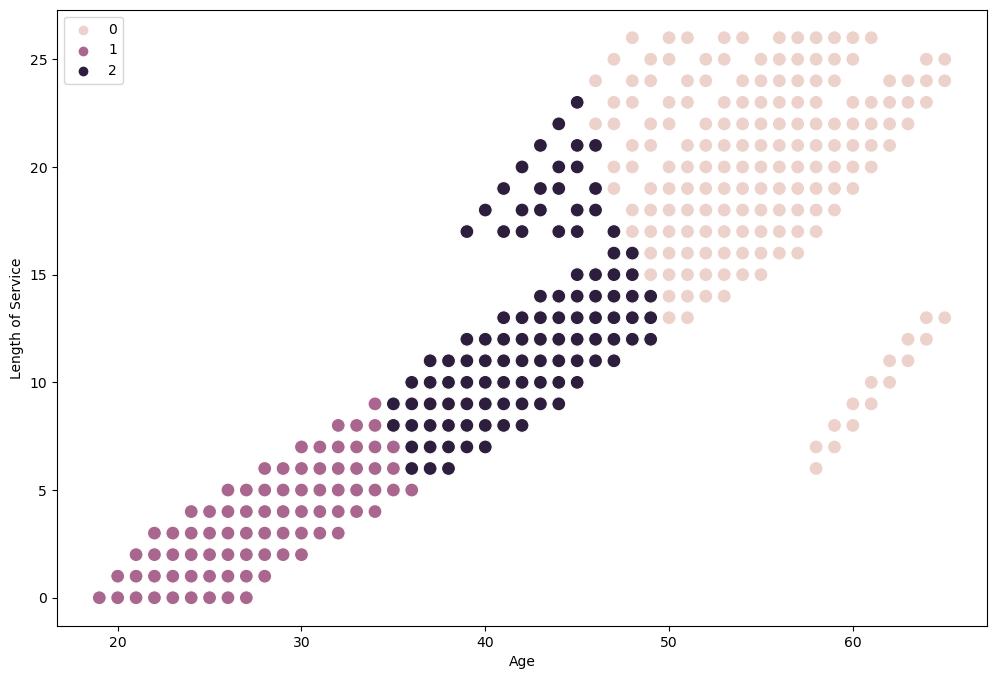

In [24]:
# Plot the clusters for the "age" and "length_of_service" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_ea_num['age'], y=df_ea_num['length_of_service'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Age') # Label x-axis.
plt.ylabel('Length of Service') # Label y-axis.
plt.show()

In the above visualization, the medium purple cluster (labeled 1 in the legend) is the cluster that is the most uniform (compared to the others), and is clustered at a younger age and shorter length of service. Until around maybe 35, it would seem that one could reasonably predict a strong, positive relationship between age and length of service. 

The next cluster of dark purple (labeled 2 in the legend) is the cluster that shows that past age 40 there is more variation in lengths of service - for example, at age 40, someone could have worked at the company for 5-6 years or up to around 18 years. This makes sense, as roles for those at age 40 could vary from those just entering the company (perhaps as a cashier) all the way to a potential Director or VP who worked their way up in the company.

The last cluster or light pink (labeled 0 in the legend) is the cluster that has the most variation in lengths of service. This most certainly makes sense because those who are retired could work part-time at the company as a way to pass time (again, for e.g. as a cashier) - and those at a similar age or closer to retiring age could be at the company a long time, having worked their way up to VP or to a role on the C-suite.

## 06. Descriptive Statistics

In [25]:
df_ea_num.loc[df_ea_num['clusters'] == 2, 'cluster'] = 'dark purple'
df_ea_num.loc[df_ea_num['clusters'] == 1, 'cluster'] = 'purple'
df_ea_num.loc[df_ea_num['clusters'] == 0, 'cluster'] = 'pink'

/var/folders/2x/7bz34nhx55b0cg_q5g2zvsn40000gn/T/ipykernel_71612/338338744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ea_num.loc[df_ea_num['clusters'] == 2, 'cluster'] = 'dark purple'


In [26]:
df_ea_num.groupby('cluster').agg({'age':['mean', 'median'], 
                         'length_of_service':['mean', 'median']}) 

age        length_of_service       
                  mean median              mean median
cluster                                               
dark purple  42.069292   42.0         10.821785   11.0
pink         56.298336   56.0         17.079938   17.0
purple       27.929818   28.0          3.451490    3.0

We can see from these results that those in the pink cluster are the oldest on average, more than twice as old as the mean for the purple group. We can see each cluster has a gap in the average length of service, around a 7 year difference between each of the means of the three clusters. For future steps of an analytics pipeline, it would be good to perhaps take a subset of the data and more closely analyze employees who are 20-50, since length of service begins to vary much more past age 50. This way, some results and recommendations could be generated of how to extend the tenure of employees in this age range, if that is desirable for the company.